In [1]:
import pandas as pd
import networkx as nx
import numpy as np
from viz import NetworkView
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import community
pd.set_option('display.max_rows', 100)

# Reading data

In [2]:
data = pd.read_pickle("../datasets/d1_speech.pkl")
data[['document ID', 'organization', 'concept']].to_numpy()

array([[70, 'CDU', 'Bundestag_Debate_agree'],
       [70, 'CDU', "Aid_EU's future_agree"],
       [70, 'CDU', 'Aid_Necessity_agree'],
       ...,
       [83, 'CDU', 'Financial regulation_agree'],
       [83, 'CDU', 'Crisis causes_Speculation_disagree'],
       [83, 'CDU', 'Crisis causes_EU_SGP_agree']], dtype=object)

# Generating frequent itemsets

In [3]:
def generate_transaction(data):
    data_dict = {}
    data_array = data[['document ID', 'organization', 'concept']].to_numpy()
    
    for doc_id, party, concept in data_array:
        if data_dict.get(doc_id, None):
            data_dict[doc_id].append(concept)
        else:
            data_dict[doc_id] = [concept]
    
    transactions = []
    
    for k, val in data_dict.items():
        transactions.append(val)
        
    return transactions
        
transactions = generate_transaction(data)
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
print(len(df.columns))
df_items = pd.DataFrame(list(df.columns))
print(df_items)
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=False) # Changing support threshold

frequent_itemsets
frequent_itemsets.sort_values(by=['support'], ascending=False)

202
                                           0
0                  Aid_Blank cheque_disagree
1                   Aid_Conditionality_agree
2       Aid_Crisis solution/prevention_agree
3    Aid_Crisis solution/prevention_disagree
4           Aid_Currency stabilisation_agree
..                                       ...
197          Solidarity_Greece_Left_disagree
198                  Solidarity_Greece_agree
199               Solidarity_Greece_disagree
200                     Technocracy_disagree
201                Unity_Government_disagree

[202 rows x 1 columns]


,support,itemsets
46,0.571429,(115)
81,0.500000,(184)
51,0.500000,(122)
1,0.357143,(1)
23,0.357143,(61)
...,...,...
12703,0.142857,"(65, 140, 49, 187, 61, 63)"
12704,0.142857,"(65, 201, 140, 49, 61, 63)"
12705,0.142857,"(65, 49, 178, 187, 61, 63)"
12706,0.142857,"(65, 201, 49, 178, 61, 63)"


In [4]:
# Picking top itemsets (based on support)
frequent_itemsets_200 = frequent_itemsets.head(200) # Changing number of top rows
frequent_itemsets_200

,support,itemsets
0,0.214286,(0)
1,0.357143,(1)
2,0.142857,(3)
3,0.214286,(4)
4,0.285714,(5)
...,...,...
195,0.142857,"(8, 151)"
196,0.142857,"(8, 153)"
197,0.142857,"(8, 155)"
198,0.142857,"(8, 178)"


# Finding association rules

In [5]:
d = association_rules(frequent_itemsets_200, metric="lift", min_threshold=1.000001)
d

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(5),0.214286,0.285714,0.142857,0.666667,2.333333,0.081633,2.142857
1,(5),(0),0.285714,0.214286,0.142857,0.500000,2.333333,0.081633,1.571429
2,(0),(8),0.214286,0.357143,0.142857,0.666667,1.866667,0.066327,1.928571
3,(8),(0),0.357143,0.214286,0.142857,0.400000,1.866667,0.066327,1.309524
4,(0),(17),0.214286,0.285714,0.142857,0.666667,2.333333,0.081633,2.142857
...,...,...,...,...,...,...,...,...,...
207,(155),(8),0.142857,0.357143,0.142857,1.000000,2.800000,0.091837,inf
208,(8),(178),0.357143,0.285714,0.142857,0.400000,1.400000,0.040816,1.190476
209,(178),(8),0.285714,0.357143,0.142857,0.500000,1.400000,0.040816,1.285714
210,(8),(184),0.357143,0.500000,0.214286,0.600000,1.200000,0.035714,1.250000


In [6]:
# Sorting rules by lift value
d.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(0),(72),0.214286,0.142857,0.142857,0.666667,4.666667,0.112245,2.571429
109,(87),(4),0.142857,0.214286,0.142857,1.000000,4.666667,0.112245,inf
25,(133),(0),0.142857,0.214286,0.142857,1.000000,4.666667,0.112245,inf
24,(0),(133),0.214286,0.142857,0.142857,0.666667,4.666667,0.112245,2.571429
15,(72),(0),0.142857,0.214286,0.142857,1.000000,4.666667,0.112245,inf
...,...,...,...,...,...,...,...,...,...
60,(1),(83),0.357143,0.357143,0.142857,0.400000,1.120000,0.015306,1.071429
61,(83),(1),0.357143,0.357143,0.142857,0.400000,1.120000,0.015306,1.071429
158,(8),(61),0.357143,0.357143,0.142857,0.400000,1.120000,0.015306,1.071429
72,(1),(115),0.357143,0.571429,0.214286,0.600000,1.050000,0.010204,1.071429


# Generating adjacency matrix

(202, 202)


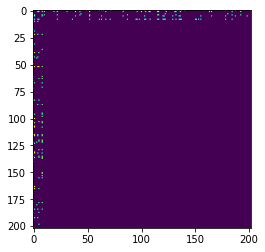

In [7]:
def association_to_graph_from_df(d_ass_rules, no_of_nodes):
        
    # Selecting columns
    d_ass_rules = d_ass_rules[['antecedents', 'consequents']]
    
    net = np.zeros((no_of_nodes, no_of_nodes))
    print(net.shape)
        
    for index, row in d.iterrows():
        ant = tuple(row.antecedents)
        con = tuple(row.consequents)
        
        for i in ant:
            for j in con:
                net[i, j] += 1
         
    return net

net = association_to_graph_from_df(d, 202) # Changing number of nodes (see above)
plt.imshow(net > 0)

# Drawing network graph

Cluster avg.: 0.48570106077846015
Density: 0.059887005649717516


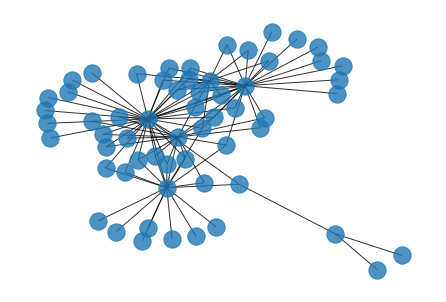

In [8]:
G = NetworkView.gen_simple_graph(net)
G.remove_nodes_from(list(nx.isolates(G)))
pos = nx.spring_layout(G)
nx.draw(G, pos, alpha=.8, )

# Computing global clustering coefficient
g_cluster = nx.average_clustering(G)
print(f'Cluster avg.: {g_cluster}')

# Computing density
density = nx.density(G)
print(f'Density: {density}')

# Generating partition graph and computing modularity

In [9]:
import colorsys

def get_N_colors(N=5):
    HSV_tuples = [(x*1.0/N, 0.8, 0.8) for x in range(N)]
    return list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))

def partition_graph(net_adj, remove_isolated=False):

    G = NetworkView.gen_simple_graph(net_adj)
    
    if remove_isolated:
        G.remove_nodes_from(list(nx.isolates(G)))
        
    partition = community.best_partition(G)
    print('No. of partitions = ', float(len(set(partition.values()))))
    
    colors = get_N_colors(len(set(partition.values())))
    
    size = float(len(set(partition.values())))
    pos = nx.spring_layout(G) # Changing layouts
    print('Modularity score: ', community.modularity(partition, G)) 

    g_d = dict(G.degree)
    plt.figure(figsize=(10,10))
    for i, com in enumerate(set(partition.values())):
        list_nodes = [nodes for nodes in partition.keys()
                                    if partition[nodes] == com]
        node_deg = np.array([g_d.get(x) for x in list_nodes])
        node_deg = 150 * node_deg / np.max(node_deg)
        nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 10 + node_deg,
                                    node_color = [colors[i]])

    nx.draw_networkx_edges(G, pos, alpha=1)
    # nx.write_gexf(G, "d1_speech.gexf")

No. of partitions =  4.0
Modularity score:  0.3448291206835172


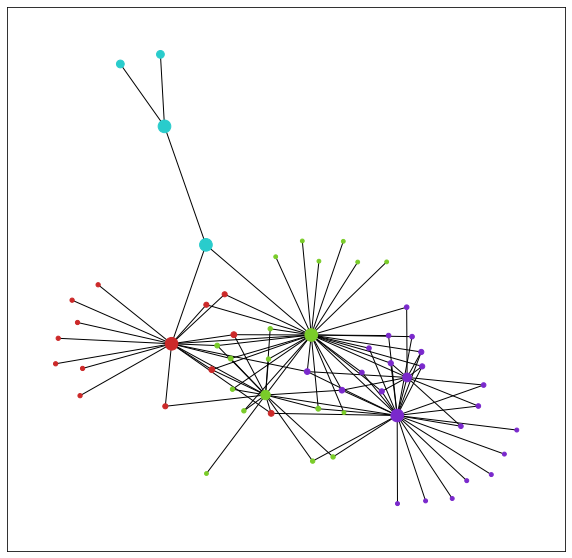

In [10]:
partition_graph(net, True)

# Saving files

In [11]:
def create_node_list(df):
    """
    This function generates a CSV file, which can be imported by Gephi
    """    
    with open('d1_speech_nodes_ass.csv', "w") as fp:
        fp.write("Id\tName\n")
        
        data = df.to_numpy()
        
        for i, row in enumerate(data):
            fp.write(f"{i}\t{row[0]}\n")
            
    print(f'Output written to => d1_speech_nodes_ass.csv')

In [12]:
create_node_list(df_items)

Output written to => d1_speech_nodes_ass.csv


In [13]:
def undirected_graph_to_csv(G, out_file_name):
    """
    This function generates a CSV file, which can be imported by Gephi
    """
    
    with open(out_file_name, "w") as fp:
        fp.write("Source\tTarget\tType\tWeight\n")
    
        # Getting the edges
        for (source, target) in list(G.edges):
            fp.write(f"{source}\t{target}\tUndirected\t{net[source, target]}\n")
            
    print(f'Output written to => {out_file_name}')

In [14]:
undirected_graph_to_csv(G, 'd1_speech_ass.csv')

Output written to => d1_speech_ass.csv
